In [13]:
import os

def combine_txt_files(input_folder, output_file):
    with open(output_file, 'w', encoding='utf-8') as outfile:
        for filename in os.listdir(input_folder):
            if filename.endswith('.txt'):
                file_path = os.path.join(input_folder, filename)
                with open(file_path, 'r', encoding='utf-8') as infile:
                    contents = infile.read()
                    outfile.write(contents)
                    outfile.write('\n')  # Thêm dòng trống giữa các file (tùy chọn)
    print(f"All .txt files have been combined into {output_file}")

# Ví dụ sử dụng:
input_folder = 'result'  # Thay đổi thành đường dẫn thư mục của bạn
output_file = 'combined_output.txt'   # Đường dẫn file tổng hợp đầu ra

combine_txt_files(input_folder, output_file)


All .txt files have been combined into combined_output.txt


In [1]:
count = {}
key = ''
try:
    for line in open('result/data_p.txt', 'r', encoding='utf-8'):
        key = line.split()[0]
        count[key] = count.get(key, 0) + 1
    sum=0
    for key in count:
        sum=count[key] +sum
except:
    print(key)
print(sum)


__label__chính_phủ
<built-in function sum>


In [3]:
count = {}
with open('result/data_p.txt', 'r', encoding='utf-8') as file:
    for line in file:
        parts = line.split()
        if parts:  # Kiểm tra xem parts có rỗng không
            key = parts[0]
            count[key] = count.get(key, 0) + 1

for key in count:
    print(f"{key}: {count[key]}")

__label__chính_phủ: 1510
__label__cộng_đồng: 1112
__label__doanh_nghiệp: 1053
__label__du_lịch: 867
về: 1
điều_khoản: 1
chúng_tôi: 1
liên_hệ: 1
__label__giải_trí: 749
__label__khoa_học: 1019
__label__nghề_nghiệp: 965
__label__nhà_cửa: 473
__label__sức_khỏe: 1261
khỏe: 10
__label__thể_thao: 844
__label__thực_phẩm: 945
__label__tin_tức: 1342
__label__tmdt: 1031
__label__tài_liệu: 509
việt_nam: 6
__label__xe_cộ: 1126
__label__động_vật: 860
__label__đời_sống: 698


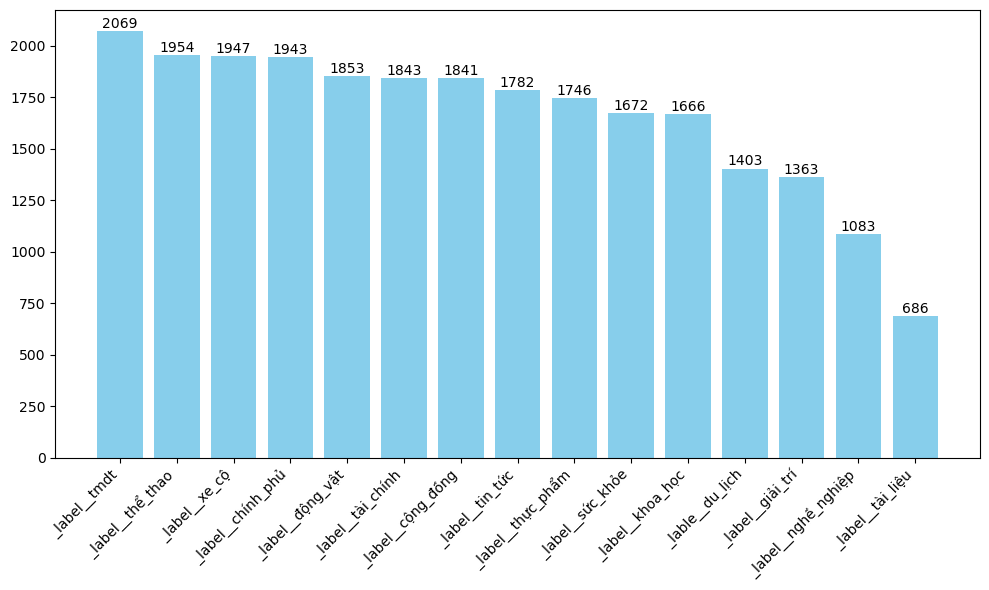

In [ ]:
import matplotlib.pyplot as plt
# Sắp xếp dữ liệu theo số lượng từ lớn đến bé

sorted_count = dict(sorted(count.items(), key=lambda item: item[1], reverse=True))

# Vẽ biểu đồ
labels = list(sorted_count.keys())
values = list(sorted_count.values())

plt.figure(figsize=(10, 6))
bars = plt.bar(labels, values, color='skyblue')

# Thêm số liệu trên đầu mỗi cột nhãn
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.savefig('countlabel.pdf')
plt.show()

In [ ]:
# Chia tập train/test
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
test_percent = 0.2

text = []
label = []

for line in open('result/data_p.txt'):
    words = line.strip().split()
    label.append(words[0])
    text.append(' '.join(words[1:]))

X_train, X_test, y_train, y_test = train_test_split(text, label, test_size=test_percent, random_state=42)

# Lưu train/test data
# Giữ nguyên train/test để về sau so sánh các mô hình cho công bằng
with open('train.txt', 'w') as fp:
    for x, y in zip(X_train, y_train):
        fp.write('{} {}\n'.format(y, x))

with open('test.txt', 'w') as fp:
    for x, y in zip(X_test, y_test):
        fp.write('{} {}\n'.format(y, x))

# encode label
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print(list(label_encoder.classes_), '\n')
y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test)

print(X_train[0], y_train[0], '\n')
print(X_test[0], y_test[0])